In [3]:
print("INFSCI 2165 ADV Topics Data Mining")
print('John Song(chs342@pitt.edu)')
print('Homework 2_resubmit')
print('12/11/2023')

INFSCI 2165 ADV Topics Data Mining
John Song(chs342@pitt.edu)
Homework 2_resubmit
12/11/2023


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Netflix_hw" -l

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
total 6590773
-rw------- 1 root root 2610540665 Oct  1 00:54 data.csv
-rw------- 1 root root     277930 Oct 23 15:39 Data_mining_hw1.ipynb
-rw------- 1 root root     212685 Oct 23 20:38 data_mining_hw2.ipynb
-rw------- 1 root root     577547 Nov 13  2019 movie_titles.csv
-rw------- 1 root root     594939 Oct  2 18:40 movie_titlesUpdate.csv
-rw------- 1 root root   10782692 Nov 13  2019 probe.txt
-rw------- 1 root root   52452386 Nov 13  2019 qualifying.txt
-rw------- 1 root root  585209161 Oct 23 18:04 test2.pkl
-rw------- 1 root root  522102823 Oct  2 01:57 test.csv
-rw------- 1 root root  877759827 Oct 23 18:21 train2_train.pkl
-rw------- 1 root root 2088437888 Oct  2 01:55 train.csv


## Data Representation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [ ]:
## reading data
df = pd.read_csv('/content/drive/MyDrive/Netflix_hw/data.csv',
                 sep=',',
                 names=['moive','user','rating','date'])

In [ ]:
df.head()

,moive,user,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [ ]:
## check the rating
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
## From hw1, the pre-processing has been already finished.  I will start to split data

import os

if not os.path.isfile('/content/drive/MyDrive/Netflix_hw/train2.pkl'):
  df.iloc[:int(df.shape[0]*0.8)].to_pickle('/content/drive/MyDrive/Netflix_hw/train2.pkl')
  train_df = pd.read_pickle('/content/drive/MyDrive/Netflix_hw/train2.pkl')
  train_df.reset_index(drop=True, inplace=True)

else:
  train_df = pd.read_pickle('/content/drive/MyDrive/Netflix_hw/train2.pkl')
  train_df.reset_index(drop=True, inplace=True)


if not os.path.isfile('/content/drive/MyDrive/Netflix_hw/test2.pkl'):
  df.iloc[int(df.shape[0]*0.8):].to_pickle('/content/drive/MyDrive/Netflix_hw/test2.pkl')
  test_df = pd.read_pickle('/content/drive/MyDrive/Netflix_hw/test2.pkl')
  test_df.reset_index(drop=True, inplace=True)

else:
  test_df = pd.read_pickle('/content/drive/MyDrive/Netflix_hw/test2.pkl')
  test_df.reset_index(drop=True, inplace=True)


In [ ]:
train_df.head()

,moive,user,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [ ]:
train_df.describe()['rating']

count    8.038440e+07
mean     3.602851e+00
std      1.086498e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Training Data

In [ ]:
## since the testing data is for evulation, I will operate training data.
## since training data is quite big for the computing resources, I will futher split later.

def changingLabel(number):
  return str(number/10**6) + 'M'

<ipython-input-10-3a9377a29db0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([changingLabel(num) for num in ax.get_yticks()])


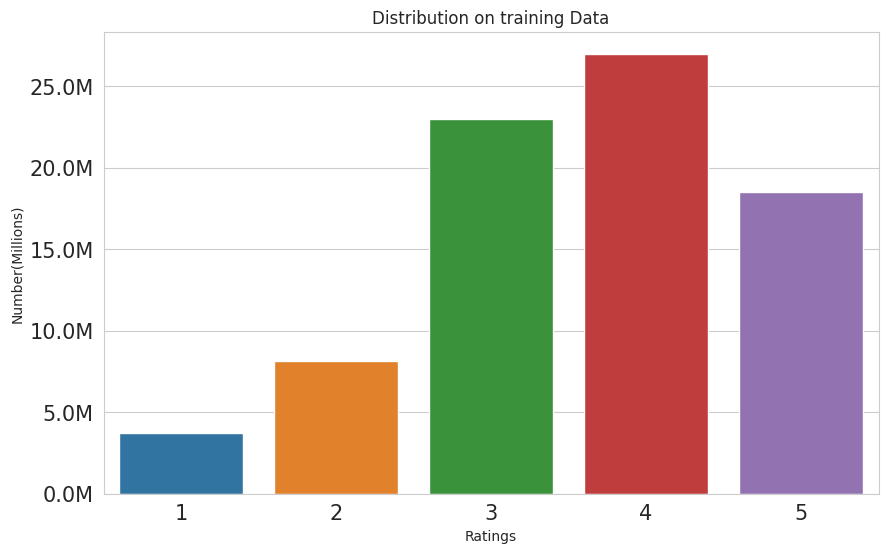

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x='rating', data = train_df)

ax.set_yticklabels([changingLabel(num) for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title('Distribution on training Data')
plt.xlabel("Ratings")
plt.ylabel('Number(Millions)')
plt.show()

In [ ]:
## since training data is quite big for the computing resources, I will futher split . just use 30%
## tried 30% . it is still out of memory for 12gb ram
# Thus, I will try 15%
train_df.iloc[:int(df.shape[0]*0.15)].to_pickle('/content/drive/MyDrive/Netflix_hw/train2_train.pkl')


In [ ]:
train_sample = pd.read_pickle('/content/drive/MyDrive/Netflix_hw/train2_train.pkl')

In [ ]:
train_sample.describe()['rating']

count    1.507208e+07
mean     3.618196e+00
std      1.079849e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
train_sample.head()

,moive,user,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


<ipython-input-12-43c5ae43ee2c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([changingLabel(num) for num in ax.get_yticks()])


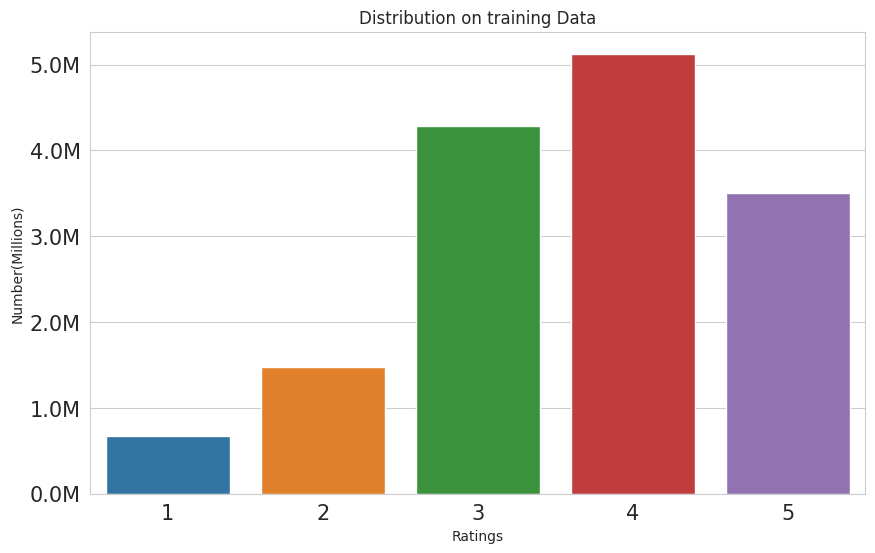

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x='rating', data = train_sample)

ax.set_yticklabels([changingLabel(num) for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title('Distribution on training Data')
plt.xlabel("Ratings")
plt.ylabel('Number(Millions)')
plt.show()

<ipython-input-13-aabea5867e97>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([changingLabel(num) for num in ax.get_yticks()])


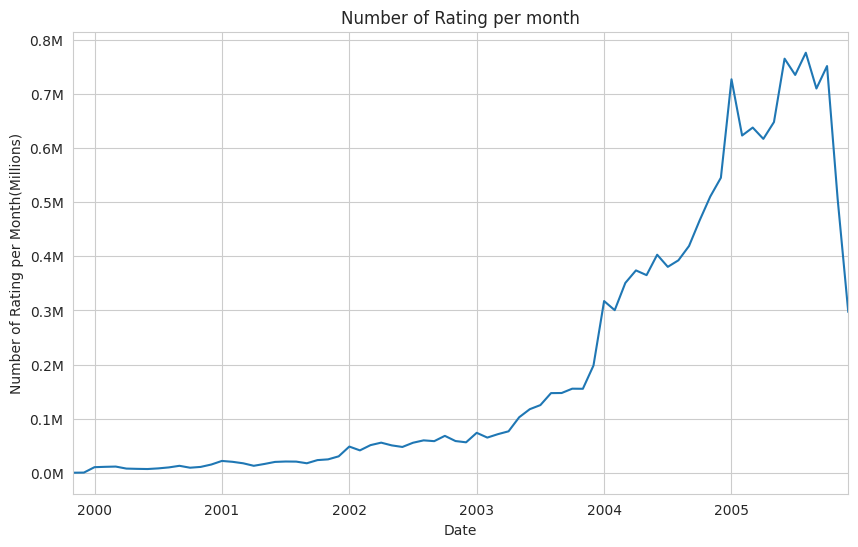

In [ ]:
## number of rating per month
train_sample['date'] = pd.to_datetime(train_sample['date'])

plt.figure(figsize=(10,6))

ax= train_sample.resample('M', on='date')['rating'].count().plot()

ax.set_yticklabels([changingLabel(num) for num in ax.get_yticks()])
ax.set_title("Number of Rating per month")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Rating per Month(Millions)")
plt.tick_params
plt.show()


In [ ]:
## user with rating

non_related_m_u = train_sample.groupby(by='user')['rating'].count().sort_values(ascending=False)
non_related_m_u.head()

user
305344     5475
387418     5419
2439493    5126
1664010    4931
2118461    4615
Name: rating, dtype: int64

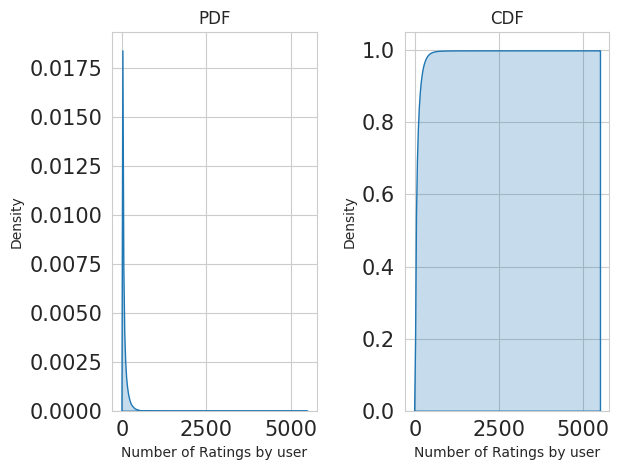

In [ ]:
fig, axes = plt.subplots(nrows =1, ncols =2)

sns.kdeplot(non_related_m_u.values, fill = True, ax=axes[0])
axes[0].set_title("PDF")
axes[0].set_xlabel("Number of Ratings by user")
axes[0].tick_params(labelsize = 15)

sns.kdeplot(non_related_m_u.values, fill = True, cumulative = True, ax = axes[1])
axes[1].set_title("CDF")
axes[1].set_xlabel("Number of Ratings by user")
axes[1].tick_params(labelsize = 15)

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

- all most all users give few ratings.

In [ ]:
## split data for train_sample to build model

train_sample.iloc[:int(train_sample.shape[0]*0.8)].to_pickle('/content/drive/MyDrive/Netflix_hw/train2_train_sample.pkl')
train_sample.iloc[int(train_sample.shape[0]*0.8):].to_pickle('/content/drive/MyDrive/Netflix_hw/train2_test_sample.pkl')



### use small sample size of training for building and testing models due to the limitation of computer resources

In [5]:
trainD = pd.read_pickle('./train2_train_sample.pkl')
testD = pd.read_pickle('./train2_test_sample.pkl')

In [6]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",trainD.shape[0])
print("Total No of Users   :", len(np.unique(trainD.user)))
print("Total No of movies  :", len(np.unique(trainD.moive)))

Training data 
--------------------------------------------------

Total no of ratings : 12057660
Total No of Users   : 455987
Total No of movies  : 2342


In [5]:
print("Testing data ")
print("-"*50)
print("\nTotal no of ratings :",testD.shape[0])
print("Total No of Users   :", len(np.unique(testD.user)))
print("Total No of movies  :", len(np.unique(testD.moive)))

Testing data 
--------------------------------------------------

Total no of ratings : 3014416
Total No of Users   : 376009
Total No of movies  : 559


In [6]:
trainD.head()

,moive,user,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


## Modeling
since CF baseline model is showed at hw1, I will perform other *models*

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163343 sha256=6cc20f33401cd8967c87c87ddbdd9b83255af7869b7496c7350c02870ced5011
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [7]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error


from surprise import Reader, Dataset
from surprise import SVD

import pandas as pd
from datetime import datetime
import numpy as np


### B2)SVD Matrix Factorization baseline

In [5]:
## data perparation for fitting surprise library model


reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(trainD[['user','moive','rating']],reader)
trainset = data.build_full_trainset()


In [6]:
testset = list(zip(testD['user'].values, testD['moive'].values, testD['rating'].values))
testset[:3]

[(1440682, 2342, 3), (957478, 2342, 5), (2016602, 2342, 4)]

### Utility function





In [7]:
import random
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    predicted = np.array([pred.est for pred in predictions])
    return actual, predicted
#in surprise prediction of every data point is returned as dictionary like this:
#"user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}"
#In this dictionary, "r_ui" is a key for actual rating and "est" is a key for predicted rating

def get_error(predictions):
    actual, predicted = get_ratings(predictions)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(abs((actual - predicted)/actual))*100
    return rmse, mape


In [8]:
my_seed = 10
random.seed(my_seed)
np.random.seed(my_seed)

def run_surprise(algo, trainset, testset, model_name):
    startTime = datetime.now()

    train = dict()
    test = dict()

    algo.fit(trainset)
    #You can check out above function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in
    #"Train-test split and the fit() method" section

#-----------------Evaluating Train Data------------------#
    print("-"*50)
    print("TRAIN DATA")
    train_pred = algo.test(trainset.build_testset())
    #You can check out "algo.test()" function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in
    #"Train-test split and the fit() method" section
    #You can check out "trainset.build_testset()" function at "https://surprise.readthedocs.io/en/stable/FAQ.html#can-i-use-my-own-dataset-with-surprise-and-can-it-be-a-pandas-dataframe" in
    #"How to get accuracy measures on the training set" section
    train_actual, train_predicted = get_ratings(train_pred)
    train_rmse, train_mape = get_error(train_pred)
    print("RMSE = {}".format(train_rmse))
    print("MAPE = {}".format(train_mape))
    print("-"*50)
    train = {"RMSE": train_rmse, "MAPE": train_mape, "Prediction": train_predicted}

#-----------------Evaluating Test Data------------------#
    print("TEST DATA")
    test_pred = algo.test(testset)
    #You can check out "algo.test()" function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in
    #"Train-test split and the fit() method" section
    test_actual, test_predicted = get_ratings(test_pred)
    test_rmse, test_mape = get_error(test_pred)
    print("RMSE = {}".format(test_rmse))
    print("MAPE = {}".format(test_mape))
    print("-"*50)
    test = {"RMSE": test_rmse, "MAPE": test_mape, "Prediction": test_predicted}

    print("Time Taken = "+str(datetime.now() - startTime))

    make_table(model_name, train_rmse, train_mape, test_rmse, test_mape)

    return train, test

In [ ]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, "SVD")

model_train_evaluation["SVD"] = svd_train_results
model_test_evaluation["SVD"] = svd_test_results

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.7678664208103144
MAPE = 22.97540493423821
--------------------------------------------------
TEST DATA
RMSE = 1.026399422036717
MAPE = 30.99440919403442
--------------------------------------------------
Time Taken = 0:07:39.868596


<ipython-input-3-aa22210bfce4>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_table = error_table.append(pd.DataFrame([[model_name, rmse_train, mape_train, rmse_test, mape_test]], columns = ["Model", "Train RMSE", "Train MAPE", "Test RMSE", "Test MAPE"]))


In [10]:
from collections import defaultdict
import json
import os
def create_movie_user_dict_train(df):

    if not os.path.isfile('movie_user_train.json'):
        movie_user = defaultdict(list)
        # count=0
        for iter, row in df.iterrows():
            # count+=1
            # if count%10000==0:
            #   print(count)
            movie_user[row[0]].append([row[1], row[2]])
        my_json = json.dumps(movie_user)
        f = open("movie_user_train.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('movie_user_train.json') as json_file:
          movie_user = json.load(json_file)
    print('movie_user_train.json loaded')
    return movie_user

def create_user_movie_dict_train(df):

    if not os.path.isfile('user_movie_train.json'):
        user_movie = defaultdict(list)
        for iter, row in df.iterrows():
            user_movie[row[1]].append([row[0], row[2]])
        my_json = json.dumps(user_movie)
        f = open("user_movie_train.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('user_movie_train.json') as json_file:
          user_movie = json.load(json_file)
    print('user_movie_train.json loaded')
    return user_movie


def create_movie_user_dict_test(df):

    if not os.path.isfile('movie_user_test.json'):
        movie_user = defaultdict(list)
        for iter, row in df.iterrows():
            movie_user[row[0]].append([row[1], row[2]])
        my_json = json.dumps(movie_user)
        f = open("movie_user_test.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('movie_user_test.json') as json_file:
          movie_user = json.load(json_file)
    print('movie_user_test.json loaded')
    return movie_user

def create_user_movie_dict_test(df):

    if not os.path.isfile('user_movie_test.json'):
        user_movie = defaultdict(list)
        for iter, row in df.iterrows():
            user_movie[row[1]].append([row[0], row[2]])
        my_json = json.dumps(user_movie)
        f = open("user_movie_test.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('user_movie_test.json') as json_file:
          user_movie = json.load(json_file)
    print('user_movie_test.json loaded')
    return user_movie

In [8]:
import gc

In [11]:
movie_user_train = create_movie_user_dict_train(trainD)
gc.collect()

opening json file
movie_user_train.json loaded


0

In [12]:
user_movie_train = create_user_movie_dict_train(trainD)
gc.collect()

opening json file
user_movie_train.json loaded


0

In [13]:
movie_user_test = create_movie_user_dict_test(testD)
gc.collect()

opening json file
movie_user_test.json loaded


0

In [14]:
user_movie_test = create_user_movie_dict_test(testD)
gc.collect()

opening json file
user_movie_test.json loaded


0

#### building from baseline model  

$r_{ui} = \mu + b_u + b_i$  

$\sum(\mu+b_u+b_i-r_{ui})^2 + \lambda(\sum b_u^2 + \sum b_i^2)$  

Then we could calculate each value when $b_u =0$ or $b_i=0$  


$b_u = \frac{\sum (r_{ui}-\mu)}{R_u + \alpha}$


$b_i = \frac{\sum (r_{ui}-\mu - b_u)}{R_m + \beta}$

### A1) with Biases

$r_{ui} = \mu + b_u + b_i + U_uM_m^T$

From the suprise Baseline only model, it inserts biases with user-bias and item-bias.

The optimization function:  

$$
\sum_{r_{ui}𝟄R_{train}} (r_{ui}-(\mu +b_u+b_i))^2 + \lambda(b_u^2 + b_i^2)[min b_u,b_i]
$$


From those equestions, we could build the model.

In [12]:
class SVD:  
    def __init__(self,movie_user,user_movie,K=30):  
        self.movie_user=movie_user 
        self.user_movie=user_movie 
        self.K=K  
        self.bi={}  
        self.bu={}  
        self.qi={}  
        self.pu={}  
        sum_rating=0
        num_rating=0
        for key in user_movie.keys():
          num_rating+=len(user_movie[key])
          for movie_rating in user_movie[key]:
            sum_rating+=movie_rating[1]
        self.avg=sum_rating/num_rating   
        for user_id in list(user_movie.keys()): 
            uid=user_id
            self.bu.setdefault(uid,0)
            self.pu.setdefault(uid,np.random.random((self.K,1))/10*np.sqrt(self.K))
        for movie_id in list(movie_user.keys()):
            iid=movie_id  
            self.bi.setdefault(iid,0)   
            self.qi.setdefault(iid,np.random.random((self.K,1))/10*np.sqrt(self.K))  
    
    def predict(self,uid,iid):  #prediction 
        # set default when users or items never appears.  0
        self.bi.setdefault(iid,0)  
        self.bu.setdefault(uid,0)  
        self.qi.setdefault(iid,np.zeros((self.K,1)))  
        self.pu.setdefault(uid,np.zeros((self.K,1)))  
        rating=self.avg+self.bi[iid]+self.bu[uid]+np.sum(self.qi[iid]*self.pu[uid]) #prediction formula
        # rating in [1,5]
        if rating>5:  
            rating=5  
        if rating<1:  
            rating=1  
        return rating  
      
    def train(self,movie_user,steps=20,gamma=0.04,Lambda=0.15):    #trainig  
        for step in range(steps):  
            print('step',step+1,'is running')  
            KK=np.random.permutation(list(movie_user.keys())) 
            rmse=0.0;mape=0
            count1=0
            for movie_id in KK:  
                for movie_rating in movie_user[movie_id]:  
                  iid=movie_id  
                  uid=movie_rating[0]  
                  rating=movie_rating[1]  
                  eui=rating-self.predict(uid, iid)  
                  rmse+=eui**2  
                  mape+=abs(eui)/rating
                  self.bu[uid]+=gamma*(eui-Lambda*self.bu[uid])    
                  self.bi[iid]+=gamma*(eui-Lambda*self.bi[iid])  
                  tmp=self.qi[iid]  
                  self.qi[iid]+=gamma*(eui*self.pu[uid]-Lambda*self.qi[iid])  
                  self.pu[uid]+=gamma*(eui*tmp-Lambda*self.pu[uid]) 
                  count1+=1 
            gamma=0.93*gamma  #gamma = 0.93 commona factor
            print('rmse is {0:3f}, mape is {1:3f}'.format(np.sqrt(rmse/count1),mape*100/count1))  
      
    def test(self,movie_user):   
        rmse=0.0;mape=0  
        count2=0
        for movie_id in movie_user.keys(): 
          for movie_rating in movie_user[movie_id]: 
            uid=movie_rating[0]  
            iid=movie_id  
            rating=movie_rating[1]  
            eui=rating-self.predict(uid, iid)  
            rmse+=eui**2  
            mape+=abs(eui)/rating
            count2+=1
        print('rmse is {0:3f}, mape is {1:3f}'.format(np.sqrt(rmse/count2),mape*100/count2)) 

if __name__=='__main__':  
     
    a1=SVD(movie_user_train,user_movie_train,30)    
    a1.train(movie_user_train)  
    a1.test(movie_user_test)

step 1 is running
rmse is 0.980252, mape is 30.023771
step 2 is running
rmse is 0.941463, mape is 28.718113
step 3 is running
rmse is 0.929823, mape is 28.355220
step 4 is running
rmse is 0.923044, mape is 28.156753
step 5 is running
rmse is 0.917330, mape is 27.988180
step 6 is running
rmse is 0.912235, mape is 27.831517
step 7 is running
rmse is 0.907501, mape is 27.686072
step 8 is running
rmse is 0.903007, mape is 27.550661
step 9 is running
rmse is 0.899001, mape is 27.437010
step 10 is running
rmse is 0.895174, mape is 27.306406
step 11 is running
rmse is 0.892148, mape is 27.222286
step 12 is running
rmse is 0.889385, mape is 27.130132
step 13 is running
rmse is 0.886895, mape is 27.049107
step 14 is running
rmse is 0.884806, mape is 26.986046
step 15 is running
rmse is 0.883080, mape is 26.933389
step 16 is running
rmse is 0.881492, mape is 26.882786
step 17 is running
rmse is 0.879979, mape is 26.834315
step 18 is running
rmse is 0.879021, mape is 26.807900
step 19 is running


In [15]:
a1_rmse =1.0233
a1_mape = 31.1232

### A2) With implicit feedback



$$r_{ui} = \mu + b_u + b_i + q^T_i(p_u+\mid I_u\mid^{-\frac{1}{2}}\sum_{j\in i_u} y_j)
$$


Optimization:  

$$
\sum_{r_{ui}\in R_{train}}(r_{ui} - \hat r_{ui})^2 + \lambda(b_i^2+b_u^2+q_i^2+p_u^2+y_j^2)[min \space b_u, b_i, q_i, p_u, y_i]
$$


From those equations, we could build the modewl with implicit feedback.

In [9]:
from surprise import SVDpp

In [10]:
svdpp = SVDpp(n_factors =50, random_state = 15, verbose = True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, "SVDpp")

model_train_evaluation["SVDpp"] = svdpp_train_results
model_test_evaluation["SVDpp"] = svdpp_test_results

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.7666820195018308
MAPE = 21.716692823290824
--------------------------------------------------
TEST DATA
RMSE = 1.0296661497866417
MAPE = 31.137085579829698
--------------------------------------------------
Time Taken = 0:36:55.832798


NameError: name 'make_table' is not defined

In [17]:
a2_rmse =1.0296
a2_mape = 31.1371

### A3) Temporal Dynamic 1

$r_{ui}(t) = \mu + b_u + b_i + b_{i,bin(t)}$  

In [18]:
from collections import defaultdict
import json
def create_movie_user_dict_train_date(df):

    if not os.path.isfile('movie_user_train_date.json'):
        movie_user = defaultdict(list)
        # count=0
        for iter, row in df.iterrows():

            movie_user[row[3].year].append([row[0], row[1], row[2]])
        my_json = json.dumps(movie_user)
        f = open("movie_user_train_date.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('movie_user_train_date.json') as json_file:
          movie_user = json.load(json_file)
    print('movie_user_train_date.json loaded')
    return movie_user

def create_movie_user_dict_test_date(df):

    if not os.path.isfile('movie_user_test_date.json'):
        movie_user = defaultdict(list)
        for iter, row in df.iterrows():
            movie_user[row[3].year].append([row[0], row[1], row[2]])
        my_json = json.dumps(movie_user)
        f = open("movie_user_test_date.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('movie_user_test_date.json') as json_file:
          movie_user = json.load(json_file)
    print('movie_user_test_date.json loaded')
    return movie_user

In [19]:
import gc


In [20]:
movie_user_train_date = create_movie_user_dict_train_date(trainD)
gc.collect()

movie_user_train_date.json loaded


0

In [21]:
movie_user_test_date = create_movie_user_dict_test_date(testD)
gc.collect()

movie_user_test_date.json loaded


0

In [23]:
import random

In [24]:
class SVDTD1:  
    def __init__(self,movie_user,user_movie,movie_user_date,K=30):  
        self.movie_user=movie_user 
        self.user_movie=user_movie
        self.movie_user_date=movie_user_date
        self.K=K  
        self.bi=defaultdict(dict)  
        self.bu=defaultdict(dict)
        self.qi={}  
        self.pu={}  
        sum_rating=0
        num_rating=0
        for key in user_movie.keys():
            num_rating+=len(user_movie[key])
            for movie_rating in user_movie[key]:
                sum_rating+=movie_rating[1]
        self.avg=sum_rating/num_rating  
        for year in movie_user_date.keys():
            for movie_user_rating in  movie_user_date[year]:
                self.bi[year].setdefault(movie_user_rating[0],0)
                self.bu[year].setdefault(movie_user_rating[1],0)

        for user_id in list(user_movie.keys()): 
            uid=user_id
            self.pu.setdefault(uid,np.random.random((self.K,1))/10*np.sqrt(self.K))

        for movie_id in list(movie_user.keys()):
            iid=movie_id    
            self.qi.setdefault(iid,np.random.random((self.K,1))/10*np.sqrt(self.K))  
            
    def predict(self,uid,iid,year):  
        #default = 0 
        self.bi[year].setdefault(iid,0)  
        self.bu[year].setdefault(uid,0)  
        self.qi.setdefault(iid,np.zeros((self.K,1)))  
        self.pu.setdefault(uid,np.zeros((self.K,1)))  
        rating=self.avg+self.bi[year][iid]+self.bu[year][uid]+np.sum(self.qi[iid]*self.pu[uid])  
        #range [1,5]  
        if rating>5:  
            rating=5  
        if rating<1:  
            rating=1  
        return rating  
      
    def train(self,movie_user_date,steps=10,gamma=0.04,Lambda=0.15):  # step =10;  
        mape_last=10000
        for step in range(steps):  
            print('step',step+1,'is running')  
            
            rmse=0.0;mape=0
            count1=0
            
            for year in movie_user_train_date.keys():
                random.shuffle(movie_user_date[year]) 
                for movie_user_rating in movie_user_date[year]:  
                    iid=movie_user_rating[0]  
                    uid=movie_user_rating[1]  
                    rating=movie_user_rating[2]  
                    eui=rating-self.predict(uid, iid, year)  
                    rmse+=eui**2  
                    mape+=abs(eui)/rating
                    self.bu[year][uid]+=gamma*(eui-Lambda*self.bu[year][uid])    
                    self.bi[year][iid]+=gamma*(eui-Lambda*self.bi[year][iid])  
                    tmp=self.qi[iid]  
                    self.qi[iid]+=gamma*(eui*self.pu[uid]-Lambda*self.qi[iid])  
                    self.pu[uid]+=gamma*(eui*tmp-Lambda*self.pu[uid]) 
                    count1+=1 
            
            gamma=0.93*gamma  # common factor 0.93 
            mape_avg=mape*100/count1
            print('rmse is {0:3f}, mape is {1:3f}'.format(np.sqrt(rmse/count1),mape_avg))
            if mape_avg>mape_last:
                break
            mape_last=mape_avg 
      
    def test(self,movie_user_test_date):   
        rmse=0.0;mape=0  
        count2=0
        rating_a3=[]
        prediction_a3=[]
        for year in movie_user_test_date.keys(): 
            for movie_user_rating in movie_user_test_date[year]: 
                uid=movie_user_rating[1]  
                iid=movie_user_rating[0]  
                rating=movie_user_rating[2]
                rating_a3.append(rating)  
                prediction=self.predict(uid, iid, year)
                prediction_a3.append(prediction)
                eui=rating-prediction  
                rmse+=eui**2  
                mape+=abs(eui)/rating
                count2+=1
        print('rmse is {0:3f}, mape is {1:3f}'.format(np.sqrt(rmse/count2),mape*100/count2)) 
        rating_a3_csv=pd.DataFrame(data=rating_a3)
        prediction_a3_csv=pd.DataFrame(data=prediction_a3)
        rating_a3_csv.to_csv('rating_a3.csv',encoding='utf-8')
        prediction_a3_csv.to_csv('prediction_a3.csv',encoding='utf-8') 
    
if __name__=='__main__':
    a3=SVDTD1(movie_user_train,user_movie_train,movie_user_train_date,30)
    a3.train(movie_user_train_date)
    a3.test(movie_user_test_date)

step 1 is running
rmse is 0.967222, mape is 29.981707
step 2 is running
rmse is 0.930831, mape is 28.571019
step 3 is running
rmse is 0.920173, mape is 28.160160
step 4 is running
rmse is 0.914258, mape is 27.935809
step 5 is running
rmse is 0.910293, mape is 27.786628
step 6 is running
rmse is 0.907334, mape is 27.679886
step 7 is running
rmse is 0.904942, mape is 27.593672
step 8 is running
rmse is 0.902979, mape is 27.525113
step 9 is running
rmse is 0.901301, mape is 27.467755
step 10 is running
rmse is 0.899830, mape is 27.417144
rmse is 1.022101, mape is 31.071985


In [25]:
a3_rmse=1.0221
a3_mape=31.0719

### A4) temporal II

$r_{ui}(t) = \mu + b_u(t) + b_i(t) + q_i^T * M$    

$M = (p_u(t) + \mid R(u) \mid^{\frac{-1}{2}} \sum y_j)$

In [28]:
class SVDTD2:  
    def __init__(self,movie_user,user_movie,movie_user_date,K=30):  
        self.movie_user=movie_user 
        self.user_movie=user_movie
        self.movie_user_date=movie_user_date
        self.K=K  
        self.bi=defaultdict(dict)  
        self.bu=defaultdict(dict)
        self.qi={}  
        self.pu=defaultdict(dict)  
        sum_rating=0
        num_rating=0
        for key in user_movie.keys():
            num_rating+=len(user_movie[key])
            for movie_rating in user_movie[key]:
                sum_rating+=movie_rating[1]
        self.avg=sum_rating/num_rating  
        for year in movie_user_date.keys():
            for movie_user_rating in  movie_user_date[year]:
                self.bi[year].setdefault(movie_user_rating[0],0)
                self.bu[year].setdefault(movie_user_rating[1],0)
                self.pu[year].setdefault(movie_user_rating[1],np.random.random((self.K,1))/10*np.sqrt(self.K))

        for movie_id in list(movie_user.keys()):
            iid=movie_id    
            self.qi.setdefault(iid,np.random.random((self.K,1))/10*np.sqrt(self.K))  
    
    def predict(self,uid,iid,year):   
        # default = 0
        self.bi[year].setdefault(iid,0)  
        self.bu[year].setdefault(uid,0)  
        self.qi.setdefault(iid,np.zeros((self.K,1)))  
        self.pu[year].setdefault(uid,np.zeros((self.K,1)))  
        rating=self.avg+self.bi[year][iid]+self.bu[year][uid]+np.sum(self.qi[iid]*self.pu[year][uid]) #预测评分公式  
        # range [1,5]
        if rating>5:  
            rating=5  
        if rating<1:  
            rating=1  
        return rating  
      
    def train(self,movie_user_date,steps=10,gamma=0.04,Lambda=0.15):    # step=10  
        mape_last=10000
        for step in range(steps):  
            print('step',step+1,'is running')  
            
            rmse=0.0;mape=0
            count1=0
            
            for year in movie_user_train_date.keys():
                random.shuffle(movie_user_date[year])
                for movie_user_rating in movie_user_date[year]:  
                    iid=movie_user_rating[0]  
                    uid=movie_user_rating[1]  
                    rating=movie_user_rating[2]  
                    eui=rating-self.predict(uid, iid, year)  
                    rmse+=eui**2  
                    mape+=abs(eui)/rating
                    self.bu[year][uid]+=gamma*(eui-Lambda*self.bu[year][uid])    
                    self.bi[year][iid]+=gamma*(eui-Lambda*self.bi[year][iid])  
                    tmp=self.qi[iid]  
                    self.qi[iid]+=gamma*(eui*self.pu[year][uid]-Lambda*self.qi[iid])  
                    self.pu[year][uid]+=gamma*(eui*tmp-Lambda*self.pu[year][uid]) 
                    count1+=1 
            gamma=0.93*gamma  #gama = 0.93 
            print('rmse is {0:3f}, mape is {1:3f}'.format(np.sqrt(rmse/count1),mape*100/count1))
            if mape>mape_last:
                break
            mape_last=mape 
      
    def test(self,movie_user_test_date):   
        rmse=0.0;mape=0  
        count2=0
        rating_a4=[]
        prediction_a4=[]
        for year in movie_user_test_date.keys(): 
            for movie_user_rating in movie_user_test_date[year]: 
                uid=movie_user_rating[1]  
                iid=movie_user_rating[0]  
                rating=movie_user_rating[2]
                rating_a4.append(rating)
                prediction=self.predict(uid, iid, year)
                prediction_a4.append(prediction)
                eui=rating-prediction  
                rmse+=eui**2  
                mape+=abs(eui)/rating
                count2+=1
        print('rmse is {0:3f}, mape is {1:3f}'.format(np.sqrt(rmse/count2),mape*100/count2))
        rating_a4_csv=pd.DataFrame(data=rating_a4)
        prediction_a4_csv=pd.DataFrame(data=prediction_a4)
        rating_a4_csv.to_csv('rating_a4.csv',encoding='utf-8')
        prediction_a4_csv.to_csv('prediction_a4.csv',encoding='utf-8')  

if __name__=='__main__':
    a4=SVDTD2(movie_user_train,user_movie_train,movie_user_train_date,30)
    a4.train(movie_user_train_date)
    a4.test(movie_user_test_date)

step 1 is running
rmse is 0.984688, mape is 30.169896
rmse is 1.030398, mape is 31.773973


In [29]:
a4_rmse=1.0303
a4_mape=31.7739


## RMSE & MAPE result comparsion

In [31]:
## a1_rmse =1.0233
## a1_mape = 31.1232

## a2_rmse =1.0296
## a2_mape = 31.1371

## a3_rmse=1.0221
## a3_mape=31.0719

## a4_rmse=1.0303
## a4_mape=31.7739

## xgboost with initial 2 features (hw1)
# b1_rmse =0.9805
# b2_mape =30.8851

## KNNbaseline
# b2_rmse= 1.073
# b2_mape= 35.021

## SVD (hw1)
# b3_rmse= 0.9319
# b3_mape= 30.8193


From the graph, the XGB and movie temporal has the lowest rmse value. For the model of XGB only contain 2 inputs, and I consider it is underfitting.  Thus, the movie temporal and SVD with biases are good models. 

In [32]:
list_rmse=[b1_rmse,b2_rmse,b3_rmse,a1_rmse,a2_rmse,a3_rmse,a4_rmse]
list_mape=[b1_mape,b2_mape,b3_mape,a1_mape,a2_mape,a3_mape,a4_mape]
list_model=['b1', 'b2', 'b3', 'a1', 'a2', 'a3', 'a4']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


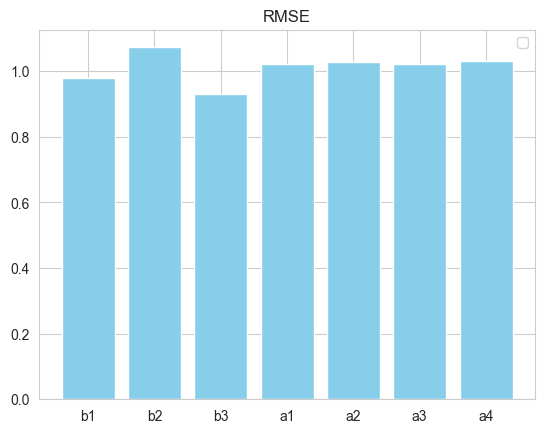

In [36]:
plt.bar(list_model, list_rmse, color='skyblue')
plt.title('RMSE')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


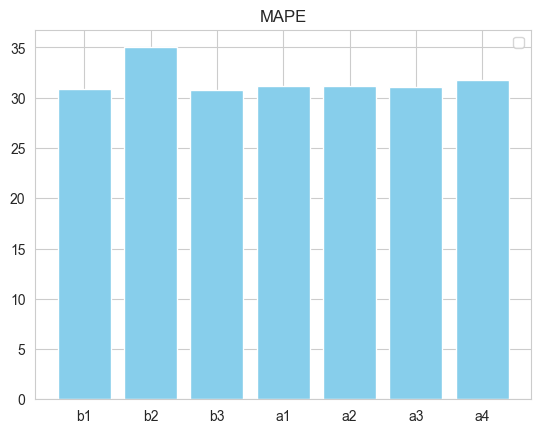

In [38]:
plt.bar(list_model, list_mape, color='skyblue')
plt.title('MAPE')
plt.legend()
plt.show()

From MAPE and RMSE, the a1 is best model. Although b3 shows performance better, I could consider there are underfit or overfit going on at this model. b3 is SVD baseline model peformance without bias. A1 is MF with bias to calculate the item-users. Thus, A1 is the best model. 